<a href="https://colab.research.google.com/github/samado11/-plot-created-with-Plotly/blob/master/Practical_Session_4_Adagrad_RMSProp_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import math

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20,50)
a=-1
b=2

In [3]:
y=(a*x)+b

#### Plot your data points. 

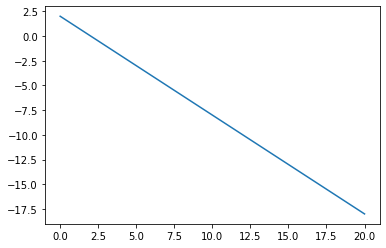

In [4]:
plt.plot(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [69]:
def adagrad(x,y,alpha,e,iterations):
    h_x=[]
    total_error_arr=[]
    epochs=[]
    thetas_0=[]
    thetas_1=[]
    theta_0=0
    theta_1=0
    v_old=(0,0)
    h_x = theta_0 + theta_1*x
    m = x.shape[0]
    for i in range(0,iterations):
        epochs.append(i)
        error =  (h_x-y)**2
        error = error * (1/2*m)
        total_error = sum(error)
        total_error_arr.append(total_error)
        theta_0_derv = sum(1/m * (h_x-y))
        theta_1_derv = sum(1/m * (h_x-y)*x)
        
        vt = ((v_old[0] +(theta_0_derv)**2) ,(v_old[1] +(theta_1_derv)**2))
        theta_0 = theta_0 - (alpha/math.sqrt(vt[0])+e)*theta_0_derv
        theta_1 = theta_1 - (alpha/math.sqrt(vt[1])+e)*theta_1_derv
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        v_old = vt
        h_x = theta_0 + theta_1 * x
        if total_error < 0.005:
            break
        plt.scatter(x,y)
        plt.plot(x, h_x)


        
#         print(theta_0,theta_1)
    return h_x,total_error_arr,thetas_0,thetas_1,epochs
    
    print(h_x)
    


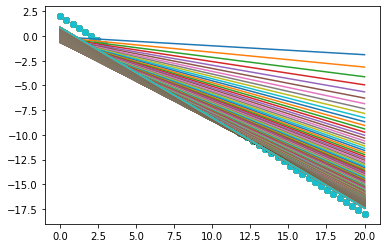

In [11]:
h_x,loss,theta_0,theta_1,epochs = adagrad(x,y,0.09,1e-8,1000)


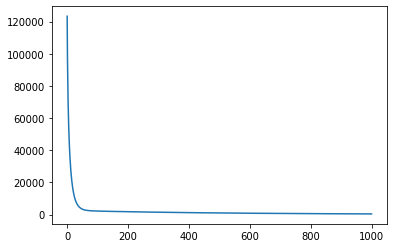

In [7]:
plt.plot(epochs,loss)

In [16]:
Score = r2_score(y,h_x)
print (Score*100)

99.05533942664752


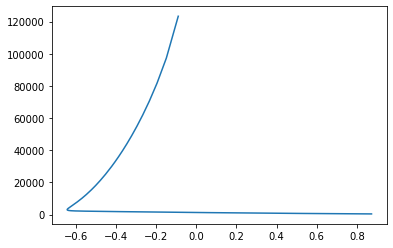

In [17]:
plt.plot(theta_0,loss)

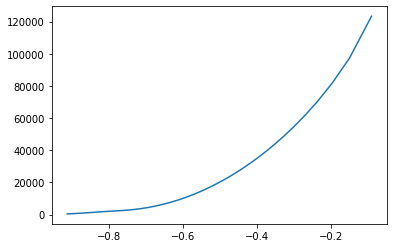

In [18]:
plt.plot(theta_1,loss)

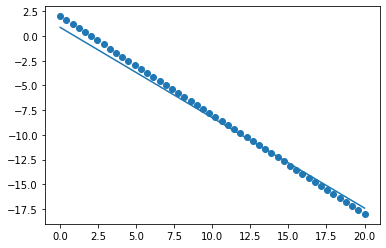

In [19]:
plt.scatter(x,y)
plt.plot(x,h_x)

### Second trial withdifferent parameters

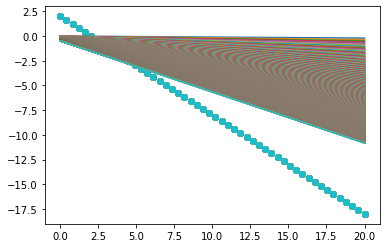

In [14]:
h_x_t2,loss_t2,theta_0_t2,theta_1_t2,epochs_t2 = adagrad(x,y,0.01,1e-7,1000)

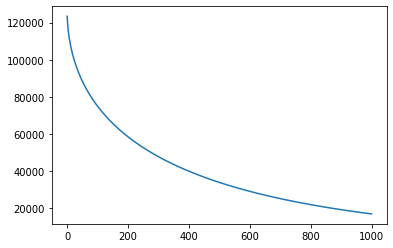

In [20]:
plt.plot(epochs_t2,loss_t2)

In [22]:

Score_t2 = r2_score(y,h_x_t2)
print (Score_t2*100)

60.86821400038016


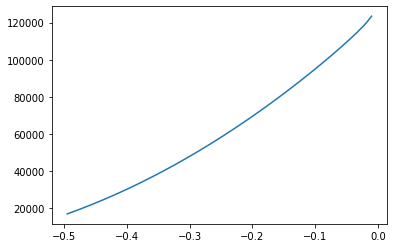

In [23]:

plt.plot(theta_0_t2,loss_t2)

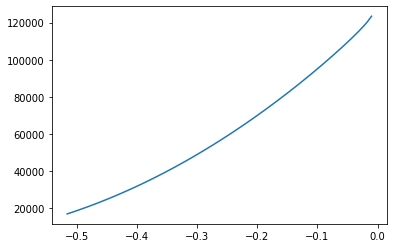

In [24]:
plt.plot(theta_1_t2,loss_t2)

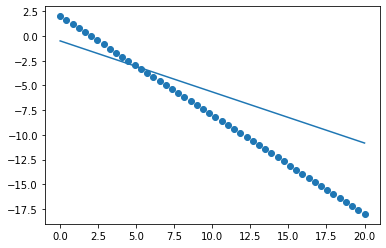

In [25]:

plt.scatter(x,y)
plt.plot(x,h_x_t2)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [70]:

def rms(x,y,alpha,e,b,iterations):
    h_x=[]
    total_error_arr=[]
    epochs=[]
    thetas_0=[]
    thetas_1=[]
    theta_0=0
    theta_1=0
    v_old=(0,0)
    h_x = theta_0 + theta_1*x
    m = x.shape[0]
    for i in range(0,iterations):
        epochs.append(i)
        error =  (h_x-y)**2
        error = error * (1/2*m)
        total_error = sum(error)
        total_error_arr.append(total_error)
        theta_0_derv = sum(1/m * (h_x-y))
        theta_1_derv = sum(1/m * (h_x-y)*x)
        
        vt = ((b*v_old[0] +(1-b)*(theta_0_derv)**2) ,(b*v_old[1] +(1-b)*(theta_1_derv)**2))
        theta_0 = theta_0 - (alpha/math.sqrt(vt[0])+e)*theta_0_derv
        theta_1 = theta_1 - (alpha/math.sqrt(vt[1])+e)*theta_1_derv
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        v_old = vt
        h_x = theta_0 + theta_1 * x
        plt.plot(x,y)
        plt.plot(x, h_x)
        if total_error < 0.00005:
            break
        plt.scatter(x,y)
        plt.plot(x, h_x)
        if total_error < 0.005:
            break
#         print(theta_0,theta_1)
    return h_x,total_error_arr,thetas_0,thetas_1,epochs
    
    print(h_x)
    


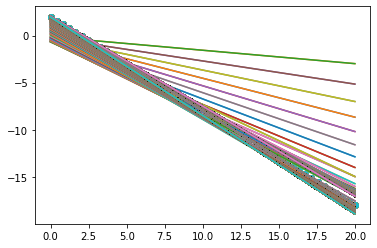

In [28]:
h_x_,loss_,theta_0_,theta_1_,epochs_ = rms(x,y,0.09,1e-8,0.6,1000)

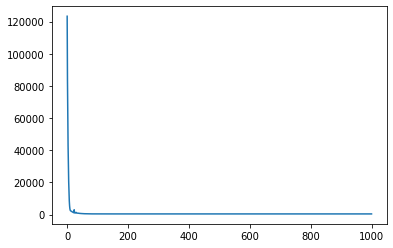

In [29]:
plt.plot(epochs_,loss_)

In [30]:
Score = r2_score(y,h_x_)
print (Score*100)

99.09125024152087


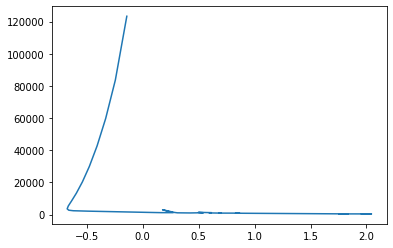

In [31]:
plt.plot(theta_0_,loss_)

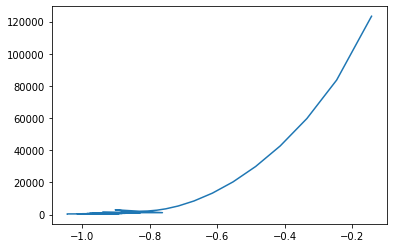

In [32]:
plt.plot(theta_1_,loss_)

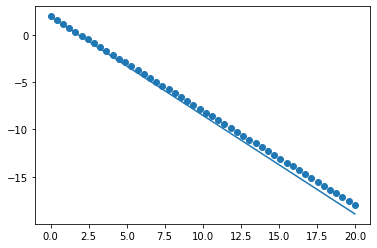

In [33]:
plt.scatter(x,y)
plt.plot(x,h_x_)

### Second trial with different parameters

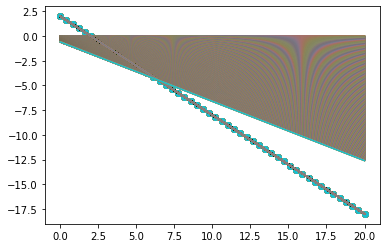

In [77]:
h_x__t2,loss__t2,theta_0__t2,theta_1__t2,epochs__t2 = rms(x,y,0.0006,1e-8,0.4,1000)

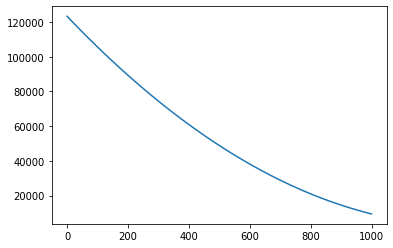

In [78]:
plt.plot(epochs_,loss__t2)

In [79]:
Score = r2_score(y,h_x__t2)
print (Score*100)

78.41321553189042


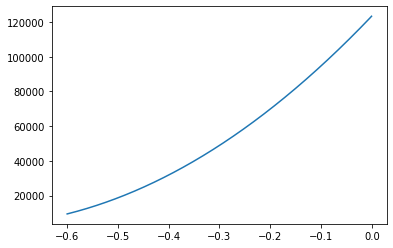

In [80]:
plt.plot(theta_0__t2,loss__t2)

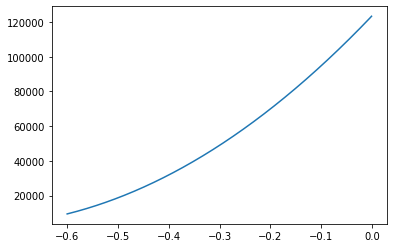

In [81]:
plt.plot(theta_1__t2,loss__t2)

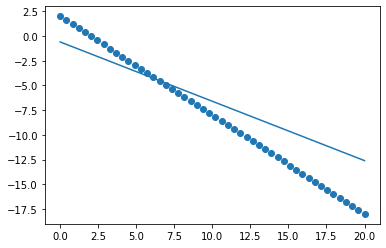

In [82]:
plt.scatter(x,y)
plt.plot(x,h_x__t2)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [71]:

def adam(x,y,alpha,e,b1,b2,iterations):
    h_x=[]
    total_error_arr=[]
    epochs=[]
    thetas_0=[]
    thetas_1=[]
    theta_0=0
    theta_1=0
    v_old=(0,0)
    m_old=(0,0)
    h_x = theta_0 + theta_1*x
    m = x.shape[0]
    for i in range(0,iterations):
        epochs.append(i)
        error =  (h_x-y)**2
        error = error * (1/2*m)
        total_error = sum(error)
        total_error_arr.append(total_error)
        theta_0_derv = sum(1/m * (h_x-y))
        theta_1_derv = sum(1/m * (h_x-y)*x)
        
        mt=(b1*m_old[0]+(1-b1)*theta_0_derv,b1*m_old[1]+(1-b1)*theta_1_derv)
        vt = ((b2*v_old[0] +(1-b2)*(theta_0_derv)**2) ,(b2*v_old[1] +(1-b2)*(theta_1_derv)**2))
        theta_0 = theta_0 - (alpha/math.sqrt(vt[0])+e)*mt[0]
        theta_1 = theta_1 - (alpha/math.sqrt(vt[1])+e)*mt[1]
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        v_old = vt
        h_x = theta_0 + theta_1 * x
        plt.scatter(x,y)
        plt.plot(x, h_x)

        if total_error < 0.005:
            break
#         print(theta_0,theta_1)
    return h_x,total_error_arr,thetas_0,thetas_1,epochs
    
    print(h_x)
    


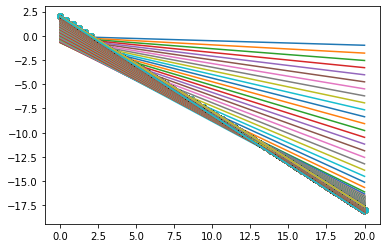

In [57]:
h_x__,loss__,theta_0__,theta_1__,epochs__ = adam(x,y,0.09,1e-8,0.6,0.4,1000)

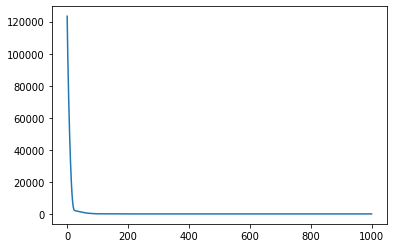

In [58]:
plt.plot(epochs__,loss__)

In [59]:
Score = r2_score(y,h_x__)
print (Score*100)

99.85460015663385


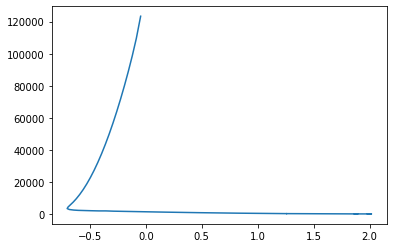

In [60]:
plt.plot(theta_0__,loss__)

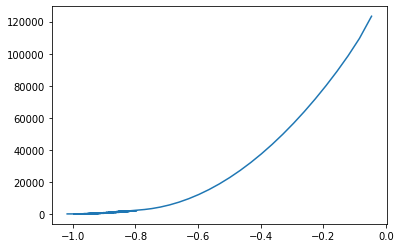

In [61]:
plt.plot(theta_1__,loss__)

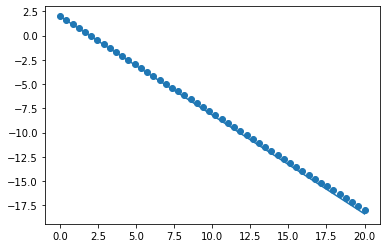

In [62]:
plt.scatter(x,y)
plt.plot(x,h_x__)

### Second trial with different parameters

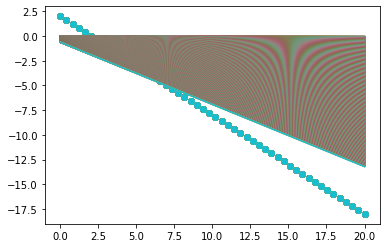

In [89]:
h_x___t2,loss___t2,theta_0___t2,theta_1___t2,epochs___t2 = adam(x,y,0.0009,1e-8,0.3,0.7,1000)

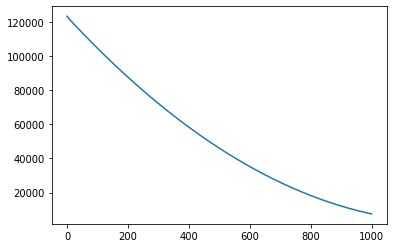

In [90]:
plt.plot(epochs___t2,loss___t2)

In [91]:
Score = r2_score(y,h_x___t2)
print (Score*100)

82.91470821633007


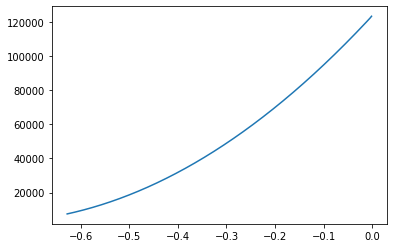

In [92]:
plt.plot(theta_0___t2,loss___t2)

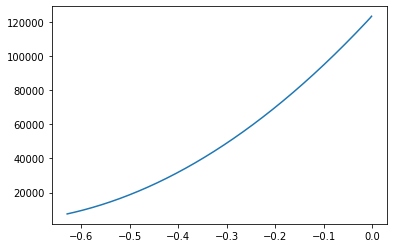

In [93]:
plt.plot(theta_1___t2,loss___t2)

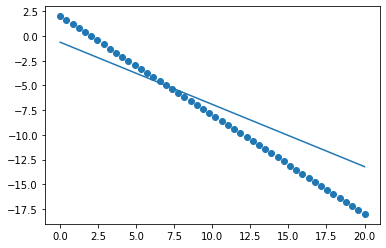

In [94]:
plt.scatter(x,y)
plt.plot(x,h_x___t2)

### Comparision

### Adagrad All hypothesis outputs

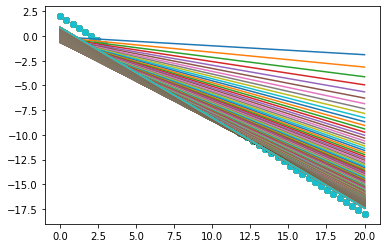

In [95]:
h_x,loss,theta_0,theta_1,epochs = adagrad(x,y,0.09,1e-8,1000)

### Rms All hypothesis outputs

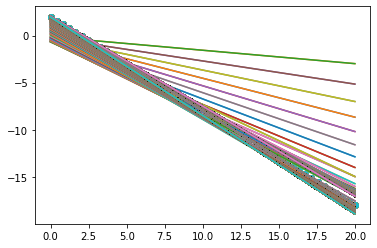

In [100]:
h_x_,loss_,theta_0_,theta_1_,epochs_ = rms(x,y,0.09,1e-8,0.6,1000)

### Adam All hypothesis outputs

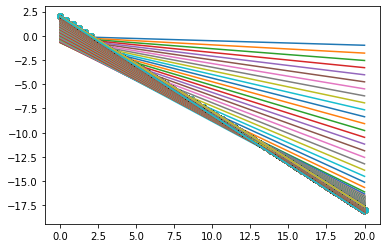

In [101]:
h_x__,loss__,theta_0__,theta_1__,epochs__ = adam(x,y,0.09,1e-8,0.6,0.4,1000)

### adagrad plot loss function with epochs

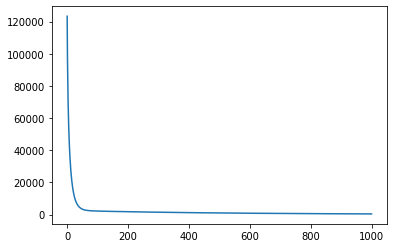

In [96]:
plt.plot(epochs,loss)

### rms plot loss function with epochs

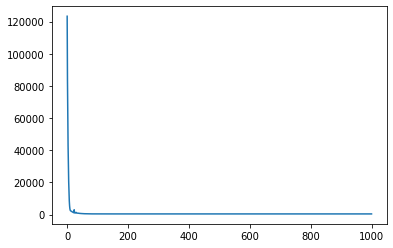

In [102]:
plt.plot(epochs_,loss_)

### adam plot loss function with epochs

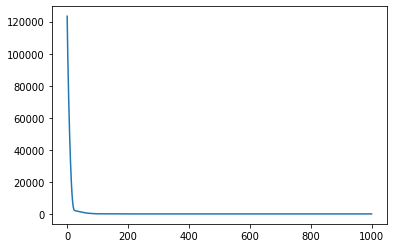

In [103]:
plt.plot(epochs__,loss__)

### adagrad R score

In [97]:
Score = r2_score(y,h_x)
print (Score*100)

99.05533942664752


### rms R score

In [104]:
Score = r2_score(y,h_x_)
print (Score*100)

99.09125024152087


### adam R score

In [105]:
Score = r2_score(y,h_x__)
print (Score*100)

99.85460015663385


### adagrad theta_0 with loss plot

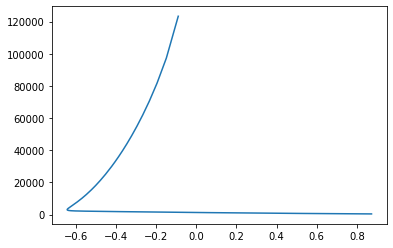

In [98]:
plt.plot(theta_0,loss)

### rms theta_0 with loss plot

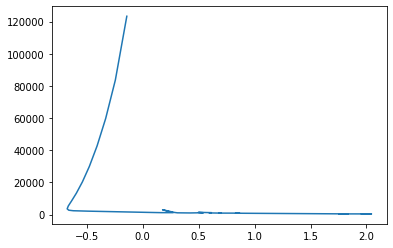

In [106]:
plt.plot(theta_0_,loss_)

### adam theta_0 with loss plot

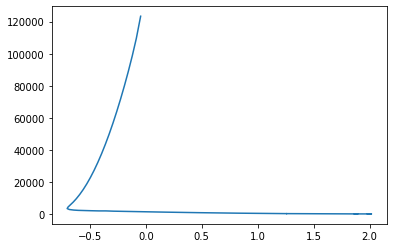

In [107]:
plt.plot(theta_0__,loss__)

### adagrad theta_1 with loss plot

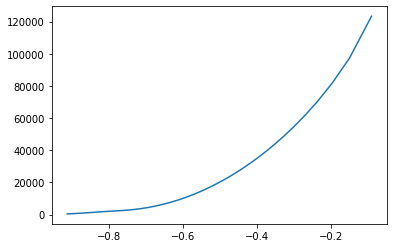

In [99]:
plt.plot(theta_1,loss)

### rms theta_1 with loss plot

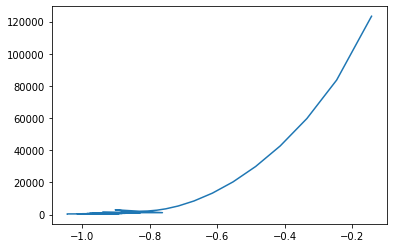

In [108]:
plt.plot(theta_1_,loss_)

### adam theta_1 with loss plot

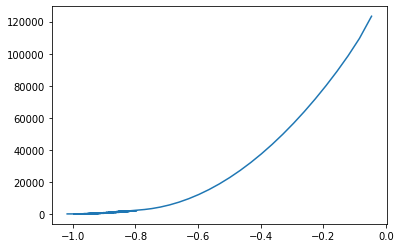

In [109]:
plt.plot(theta_1__,loss__)

### adagrad predicted line relative to actual line plot

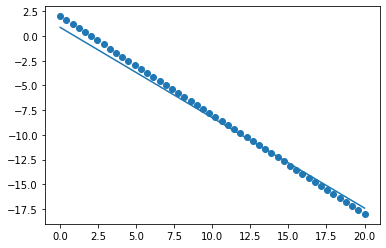

In [110]:
plt.scatter(x,y)
plt.plot(x,h_x)

### rms predicted line relative to actual line plot

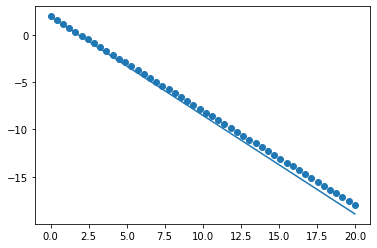

In [111]:
plt.scatter(x,y)
plt.plot(x,h_x_)

### adam predicted line relative to actual line plot

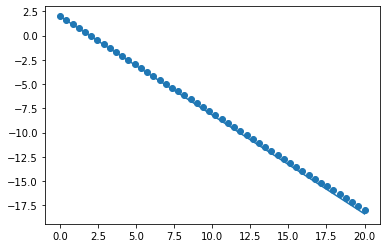

In [112]:
plt.scatter(x,y)
plt.plot(x,h_x__)

## Congratulations 
![image.png](attachment:image.png)